# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest


In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

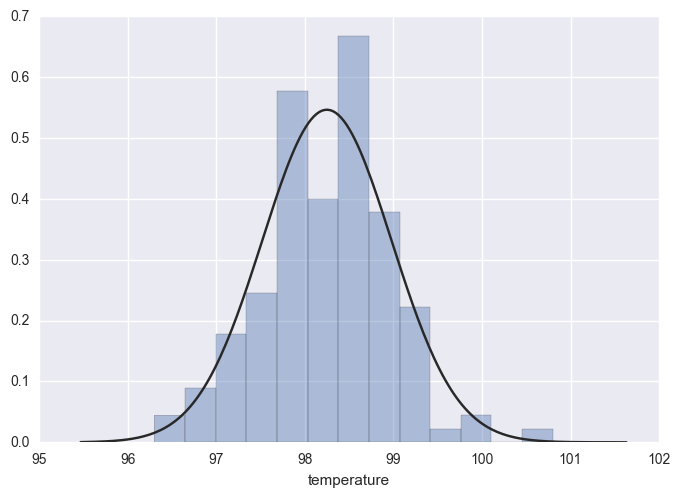

In [6]:

df_temp = df.temperature
sns.distplot(df_temp, fit=stats.norm,kde=False)


Fro the above plot, the temperature distribution appears to be normal.

In [7]:
stats.normaltest(df_temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value is approximately 26%. We can assume that temperature data is normally distributed.

### Is the sample size large? Are the observations independent?

In [8]:
# How many samples?
print("There are " + str(len(df)) + " samples")

There are 130 samples


The number of samples are greater than 30, we can consider this as a large sample size.

Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation. In this case, the temperature of one person does not provide any information about the temperature of another person. So, the observations are independent.

### Is the true population mean really 98.6 degrees F?

#### Would you use a one-sample or two-sample test? Why?

I will use the one sample t-test, because it is used to compare the mean of a sample to a known value, while a two sample t test is used to compare the means of two different samples.

#### In this situation, is it appropriate to use the  $t$ or $z$  statistic?

Since this is a large sample size (> 30), I can use the $z$ statistics.

In [9]:
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The second item in the tuple above is the p-value, which extremely small number. Therefore we reject the null hypothesis that the population mean is 98.6 degrees F. Which mean the true population mean is not 98.6 degrees F.

#### Now try using the other test. How is the result be different? Why?

Let us try the $t$ test

In [10]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The p-value is still very small and we can still reject the null hypothesis that the population mean is 98.6 degrees F.

The $t$ statistic and the $z$ statistic are equal. They are the same since we have a large sample size; hence the degree of freedom is relatively higher in this case with 129.

### At what temperature should we consider someone's temperature to be "abnormal"?

In [11]:
# assuming using 95% confidence level

tmp_mean, tmp_std = df_temp.mean(), df_temp.std()

#The critical valuefor 95% confidence level
z_critical = stats.norm.ppf(q = 0.975)  

print("Critical Z value :" + str(z_critical))

# Calculate the Standard Error

se = tmp_std/np.sqrt(len(df_temp))

print("Standard Error :" + str(se))

# Calculate the Margin of Error

me = z_critical*se

print("Margin of Error :" + str(me))

confidence_interval = [tmp_mean-me,tmp_mean+me]
confidence_interval

Critical Z value :1.95996398454
Standard Error :0.0643044168379
Margin of Error :0.126034341049


[98.123196428181657, 98.375265110279898]

In [12]:
# or using stats
stats.norm.interval(.95,loc=tmp_mean,scale=tmp_std/np.sqrt(len(df_temp)))

(98.123196428181657, 98.375265110279898)

So, temperature out of the above range is considered "abnormal".

### Is there a significant difference between males and females in normal temperature?

#### What test did you use and why?

We should use  two-sample  $t$  test because we are comparing means of two independent samples.

The null hypothesis is that male and female has equal temperature means. Then we should do two-sample $t$ test and find the p-value.

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

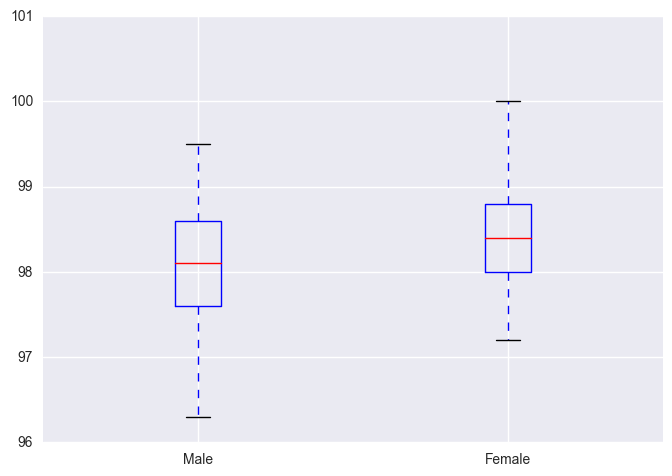

In [13]:
m_tmp = df.temperature[df.gender == 'M']
f_tmp = df.temperature[df.gender == 'F']

m_tmp_mean , f_tmp_mean = m_tmp.mean(), f_tmp.mean()
plt.boxplot([m_tmp,f_tmp],labels=['Male','Female'])

stats.ttest_ind(f_tmp,m_tmp)

The p-value is smaller than the threshold of 5% , then we reject the null hypothesis of equal means, an conclude that difference between males and females in normal temperature is not due to chance.

#### Write a story with your conclusion in the context of the original problem

From the sample in the human temperature dataset we reached to the following conclusions:

*   human temperature data is normally distributed  
*   the true population mean is not probably  at 98.6 degrees F  
*   human temperature out of the range [98.12 to 98.38] degrees F could be considered abnormal.  
*   There is a significant difference between male and female temperature means.
